# Load Packages and Data

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as sco

#load csv containing return data on assets
assets = pd.read_csv('/home/Portfolio_2.csv',header='infer',index_col='Date') 

In [4]:
assets.head(5)

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
Date,,,,,,,,,,
2015-04-01,549.489990,81.669998,59.017143,370.260010,73.779182,139.591400,81.300003,31.535204,68.523880,87.257195
2015-04-02,541.309998,81.559998,59.154285,372.250000,74.233482,140.882874,81.120003,32.055969,67.968102,87.807785
2015-04-06,543.950012,82.440002,60.330002,377.040009,74.900414,141.691223,80.980003,32.287418,69.050911,88.532707
2015-04-07,544.859985,82.320000,60.494286,374.410004,74.136803,141.022232,80.580002,32.104183,67.824371,88.284943
2015-04-08,548.840027,82.279999,63.049999,381.200012,75.084068,141.226639,83.529999,32.046318,67.345238,88.119774


In [5]:
assets.tail(5) 

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
Date,,,,,,,,,,
2018-03-23,1026.550049,159.389999,300.940002,1495.560059,21.299999,180.839996,91.949997,35.450001,83.919998,106.150002
2018-03-26,1054.089966,160.059998,320.350006,1555.859985,21.070000,187.220001,95.209999,36.580002,85.220001,106.809998
2018-03-27,1006.940002,152.220001,300.690002,1497.050049,20.250000,183.149994,93.629997,36.080002,83.660004,107.639999
2018-03-28,1005.179993,153.029999,285.769989,1431.420044,20.610001,183.610001,93.910004,35.500000,82.320000,109.180000
2018-03-29,1037.140015,159.789993,295.350006,1447.339966,20.990000,188.429993,94.900002,36.369999,83.239998,109.150002


# Calculate Daily Returns 

In [6]:
returns = (assets/assets.shift(1))-1
returns.head()

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
Date,,,,,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-02,-0.014887,-0.001347,0.002324,0.005375,0.006158,0.009252,-0.002214,0.016514,-0.008111,0.006310
2015-04-06,0.004877,0.010790,0.019875,0.012868,0.008984,0.005738,-0.001726,0.007220,0.015931,0.008256
2015-04-07,0.001673,-0.001456,0.002723,-0.006975,-0.010195,-0.004721,-0.004940,-0.005675,-0.017763,-0.002799
2015-04-08,0.007305,-0.000486,0.042247,0.018135,0.012777,0.001449,0.036610,-0.001802,-0.007064,-0.001871


# Check Distribution of Returns

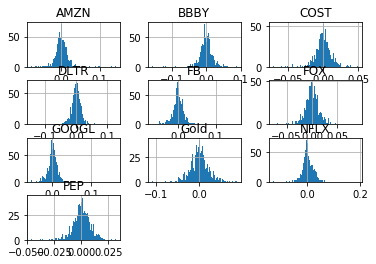

In [8]:
returns.hist(bins=100)
plt.show()

# Calculate Log Returns

In [7]:
log_returns = np.log((assets/assets.shift(1)))

In [9]:
log_returns.head()

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
Date,,,,,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-02,-0.014998,-0.001348,0.002321,0.005360,0.006139,0.009209,-0.002216,0.016379,-0.008144,0.006290
2015-04-06,0.004865,0.010732,0.019680,0.012786,0.008944,0.005721,-0.001727,0.007194,0.015806,0.008222
2015-04-07,0.001672,-0.001457,0.002719,-0.007000,-0.010247,-0.004733,-0.004952,-0.005691,-0.017922,-0.002802
2015-04-08,0.007278,-0.000486,0.041379,0.017973,0.012696,0.001448,0.035955,-0.001804,-0.007089,-0.001873


In [10]:
log_returns_means= log_returns.mean()*252
log_returns_means

GOOGL    0.212306
FB       0.224318
NFLX     0.538202
AMZN     0.455631
BBBY    -0.420122
COST     0.100268
DLTR     0.051696
FOX      0.047673
Gold     0.065021
PEP      0.074819
dtype: float64

# Covariance Matrix

In [11]:
cov_mat = log_returns.cov()*252
cov_mat

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
GOOGL,0.051703,0.037923,0.040084,0.037761,0.006759,0.014809,0.017474,0.016526,0.003415,0.011622
FB,0.037923,0.063865,0.041359,0.041199,0.006268,0.012379,0.015795,0.018267,0.004893,0.011475
NFLX,0.040084,0.041359,0.174764,0.048329,0.011944,0.016129,0.022053,0.023956,0.009260,0.011262
AMZN,0.037761,0.041199,0.048329,0.077447,0.004387,0.013007,0.015140,0.020239,0.005545,0.010551
BBBY,0.006759,0.006268,0.011944,0.004387,0.099406,0.016719,0.031556,0.020358,0.002565,0.004672
COST,0.014809,0.012379,0.016129,0.013007,0.016719,0.034535,0.021681,0.011282,-0.002043,0.010648
DLTR,0.017474,0.015795,0.022053,0.015140,0.031556,0.021681,0.079864,0.018325,-0.000960,0.010233
FOX,0.016526,0.018267,0.023956,0.020239,0.020358,0.011282,0.018325,0.060808,0.000715,0.008245
Gold,0.003415,0.004893,0.009260,0.005545,0.002565,-0.002043,-0.000960,0.000715,0.127163,0.006395
PEP,0.011622,0.011475,0.011262,0.010551,0.004672,0.010648,0.010233,0.008245,0.006395,0.017353


# Correlation Matrix

In [12]:
corr_mat = log_returns.corr()
corr_mat

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
GOOGL,1.000000,0.659948,0.421682,0.596727,0.094283,0.350461,0.271933,0.294732,0.042117,0.388017
FB,0.659948,1.000000,0.391481,0.585806,0.078667,0.263593,0.221170,0.293131,0.054295,0.344700
NFLX,0.421682,0.391481,1.000000,0.415408,0.090621,0.207611,0.186670,0.232387,0.062117,0.204512
AMZN,0.596727,0.585806,0.415408,1.000000,0.050001,0.251497,0.192502,0.294913,0.055871,0.287823
BBBY,0.094283,0.078667,0.090621,0.050001,1.000000,0.285347,0.354165,0.261850,0.022818,0.112488
COST,0.350461,0.263593,0.207611,0.251497,0.285347,1.000000,0.412833,0.246201,-0.030832,0.434950
DLTR,0.271933,0.221170,0.186670,0.192502,0.354165,0.412833,1.000000,0.262965,-0.009527,0.274878
FOX,0.294732,0.293131,0.232387,0.294913,0.261850,0.246201,0.262965,1.000000,0.008136,0.253833
Gold,0.042117,0.054295,0.062117,0.055871,0.022818,-0.030832,-0.009527,0.008136,1.000000,0.136136
PEP,0.388017,0.344700,0.204512,0.287823,0.112488,0.434950,0.274878,0.253833,0.136136,1.000000


# Random Weights via Monte Carlo Method

In [19]:
number_ports = 25000
number_assets = len(assets.columns)
Rf = .015
weight_log=[]
port_info = np.zeros((3,25000))
for x in range(number_ports):   
    weights = np.random.random(number_assets)
    weights /= np.sum(weights)
    #Save Weights
    weight_log.append(weights)
    #Expected Returns
    pret = np.sum(weights*log_returns.mean())*252
    #Save Expected Returns
    port_info[1,x] = pret
    #Expected Volatility
    pvol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252, weights)))
    #Save Expected Volatility
    port_info[0,x] = pvol
    #Save Sharpe Ratio
    port_info[2,x] =(pret - Rf)/pvol
    
port_info,weight_log 

(array([[0.14365897, 0.15598001, 0.14344649, ..., 0.14458544, 0.14830179,
         0.1608611 ],
        [0.1212781 , 0.08015034, 0.1584359 , ..., 0.10973662, 0.13775662,
         0.04444071],
        [0.73979439, 0.41768393, 0.99992615, ..., 0.65522935, 0.82774875,
         0.18301947]]),
 [array([0.00721621, 0.1210429 , 0.08125156, 0.06874213, 0.06607656,
         0.13043946, 0.10162401, 0.10270595, 0.19745913, 0.1234421 ]),
  array([0.10234308, 0.17324074, 0.00838424, 0.16372678, 0.19519414,
         0.02965192, 0.05669804, 0.07715214, 0.16458669, 0.02902221]),
  array([0.09760999, 0.09178964, 0.03994588, 0.1488204 , 0.04112386,
         0.25612967, 0.082804  , 0.07000565, 0.10793936, 0.06383157]),
  array([0.05441003, 0.05208831, 0.1625174 , 0.06908703, 0.15078714,
         0.04346037, 0.12887574, 0.15568779, 0.1525968 , 0.0304894 ]),
  array([0.28232219, 0.06249611, 0.02806029, 0.14362898, 0.04100347,
         0.11996605, 0.06673545, 0.06829318, 0.10376066, 0.08373361]),
  array([0

In [20]:
max_sharpe_idx = np.argmax(port_info[2])#Provides index location of Max Sharpe Ratio
sdp, rp = port_info[0,max_sharpe_idx], port_info[1,max_sharpe_idx]
max_sharpe_allocation = pd.DataFrame(weight_log[max_sharpe_idx],index=returns.columns,columns=['Max_Sharpe_Allocation'])
max_sharpe_allocation.Max_Sharpe_Allocation = [round(i*100,2)for i in max_sharpe_allocation.Max_Sharpe_Allocation]
max_sharpe_allocation = max_sharpe_allocation.T

min_vol_idx = np.argmin(port_info[0])
sdp_min, rp_min = port_info[0,min_vol_idx], port_info[1,min_vol_idx]
min_vol_allocation = pd.DataFrame(weight_log[min_vol_idx],index=returns.columns,columns=['Min_Vol_Allocation'])
min_vol_allocation.Min_Vol_Allocation = [round(i*100,2)for i in min_vol_allocation.Min_Vol_Allocation]
min_vol_allocation = min_vol_allocation.T

max_sharpe_allocation,min_vol_allocation

(                       GOOGL    FB  NFLX   AMZN  BBBY   COST  DLTR   FOX  \
 Max_Sharpe_Allocation   3.06  1.87  24.7  26.07  1.08  12.29  5.43  2.92   
 
                        Gold    PEP  
 Max_Sharpe_Allocation  5.29  17.29  ,
                     GOOGL    FB  NFLX  AMZN  BBBY   COST  DLTR   FOX   Gold  \
 Min_Vol_Allocation  13.48  0.43  0.05  5.81  5.71  26.73  3.45  5.59  12.31   
 
                       PEP  
 Min_Vol_Allocation  26.46  )

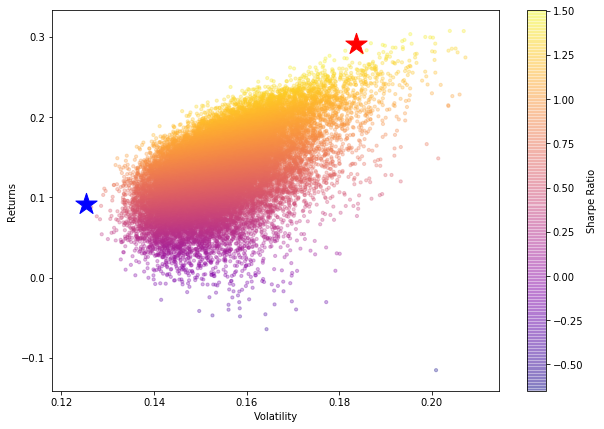

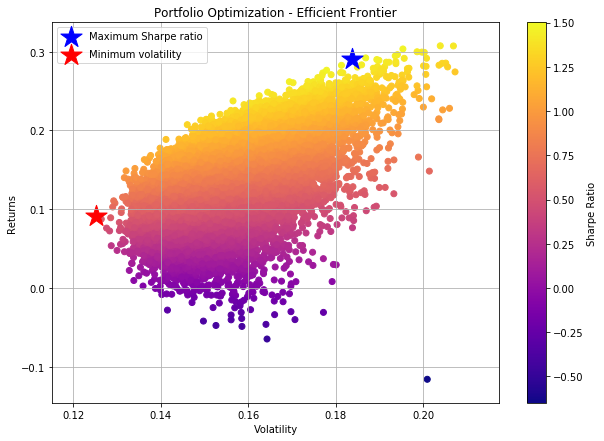

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(port_info[0,:],port_info[1,:],c=port_info[2,:],cmap='plasma', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
plt.scatter(sdp_min,rp_min,marker='*',color='b',s=500, label='Minimum volatility')
plt.show()

#
plt.figure(figsize=(10, 7))
#Assign data to axis, Vol,Returns, C= Sharpe Ratio, Cmap = 'Style'
plt.scatter(port_info[0,:],port_info[1,:],c=port_info[2,:],cmap='plasma')
#Label Colorbar
plt.colorbar(label='Sharpe Ratio')
#Label Maximum Sharpe and Minimum Vol
plt.scatter(sdp,rp,marker='*',color='b',s=500, label='Maximum Sharpe ratio')
plt.scatter(sdp_min,rp_min,marker='*',color='r',s=500, label='Minimum volatility')
#Provide a title
plt.title('Portfolio Optimization - Efficient Frontier')
plt.grid(True)
#Label X and Y Access
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.legend(labelspacing=0.8)
plt.show()



## Optimization - Maximum Sharpe Ratio

In [22]:
def optim_info(weights, returns, cov_mat):
    pvol = np.sqrt(np.dot(weights.T,np.dot(cov_mat, weights)))
    pret = np.sum(weights*log_returns.mean())*252
    return np.array([pret,pvol,(pret-Rf)/pvol])
    
def neg_sharpe_ratio(weights, returns):
    return -optim_info(weights,returns, cov_mat)[2]


args = (log_returns.mean(), cov_mat, Rf)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0.0,1.0)
bounds = tuple(bound for x in range(number_assets))
optimized = sco.minimize(neg_sharpe_ratio, weights, args=log_returns.mean(),
                        method='SLSQP', bounds=bounds, constraints=constraints)
optimized

     fun: -1.7127920851531224
     jac: array([ 0.11540911,  0.13836393, -0.05567932, -0.05621485,  1.72263229,
       -0.04763238,  0.20887129,  0.32444508, -0.05409127, -0.02379861])
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.00000000e+00, 2.99973863e-16, 2.67967210e-01, 7.21511770e-01,
       0.00000000e+00, 2.40231153e-16, 3.80254917e-16, 3.40411189e-17,
       1.05210201e-02, 2.47228194e-16])

In [23]:
Max_Sharpe_Opt_Weights = pd.DataFrame(optimized['x'].round(3),returns.columns, columns=['Max_Sharpe_Opt_Weights'])
print(Max_Sharpe_Opt_Weights.T)
print("Expected return, volatility and Sharpe ratio:",optim_info(optimized['x'], returns, cov_mat))

                        GOOGL   FB   NFLX   AMZN  BBBY  COST  DLTR  FOX  \
Max_Sharpe_Opt_Weights    0.0  0.0  0.268  0.722   0.0   0.0   0.0  0.0   

                         Gold  PEP  
Max_Sharpe_Opt_Weights  0.011  0.0  
Expected return, volatility and Sharpe ratio: [0.47364764 0.26777777 1.71279209]


## Optimization - Minimum Volatility

In [24]:
def portfolio_volatility(weights, mean_returns, cov_mat):
    return optim_info(weights, mean_returns, cov_mat)[1]


args = (log_returns.mean(), cov_mat)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0.0,1.0)
bounds = tuple(bound for asset in range(number_assets))
optimized1 = sco.minimize(portfolio_volatility, number_assets*[1./number_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
optimized1

     fun: 0.11677811988473649
     jac: array([0.1163002 , 0.11686035, 0.12823888, 0.11702894, 0.11676697,
       0.11678104, 0.11672872, 0.11697163, 0.11677704, 0.1167593 ])
 message: 'Optimization terminated successfully.'
    nfev: 120
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([2.31577338e-02, 1.98342299e-02, 2.46655994e-18, 2.30710584e-02,
       6.39532523e-02, 1.37796023e-01, 4.20950184e-03, 7.77675190e-02,
       7.65168192e-02, 5.73693862e-01])

In [25]:
Min_Vol_Opt_Weights = pd.DataFrame(optimized1['x'].round(3),returns.columns, columns=['Min_Vol_Opt_Weights'])
print(Min_Vol_Opt_Weights.T)

print("Expected return, volatility and Sharpe ratio:",optim_info(optimized1['x'],returns, cov_mat))

                     GOOGL    FB  NFLX   AMZN   BBBY   COST   DLTR    FOX  \
Min_Vol_Opt_Weights  0.023  0.02   0.0  0.023  0.064  0.138  0.004  0.078   

                      Gold    PEP  
Min_Vol_Opt_Weights  0.077  0.574  
Expected return, volatility and Sharpe ratio: [0.05864926 0.11677812 0.37377944]


## Optimize Portfolios for a Target Return

In [26]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return optim_info(weights, mean_returns, cov_mat)[0]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    eff_port_return = sco.minimize(portfolio_volatility, weights, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return eff_port_return


Target_Portfolio = efficient_return(log_returns.mean(),cov_mat, .09) #Adjust Last Param for Target Vol
Efficient_Portfolio_Weights = pd.DataFrame(Target_Portfolio['x'].round(3),returns.columns, columns=['Efficient_Portfolio_Weights'])
print(Efficient_Portfolio_Weights.T)
print("Expected return, volatility and Sharpe ratio:",optim_info(Target_Portfolio['x'],returns, cov_mat))

                             GOOGL     FB   NFLX   AMZN   BBBY   COST   DLTR  \
Efficient_Portfolio_Weights   0.02  0.016  0.003  0.058  0.029  0.153  0.009   

                               FOX   Gold    PEP  
Efficient_Portfolio_Weights  0.075  0.077  0.559  
Expected return, volatility and Sharpe ratio: [0.09       0.11764915 0.63748869]


## Optimized Portfolios within a Range

In [34]:
def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

returnsRange = np.linspace(0.0,0.5,50) 
eff_RangePorts=efficient_frontier(log_returns.mean(),cov_mat,returnsRange)

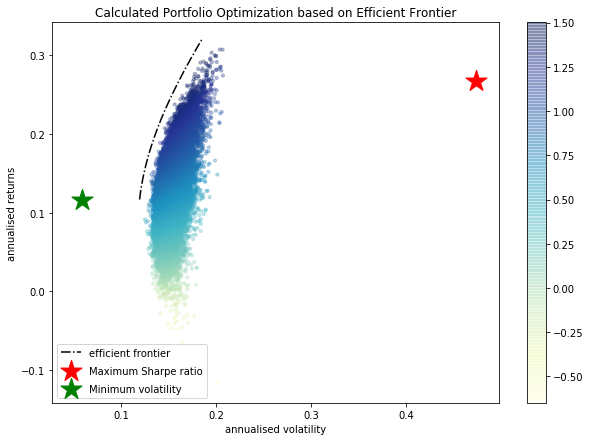

In [35]:
plt.figure(figsize=(10, 7))
plt.scatter(port_info[0,:],port_info[1,:],c=port_info[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
plt.colorbar()
plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

target = np.linspace(rp_min, 0.32, 250)
efficient_portfolios = efficient_frontier(log_returns_means, cov_mat, target)
plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('annualised volatility')
plt.ylabel('annualised returns')
plt.legend(labelspacing=0.8)

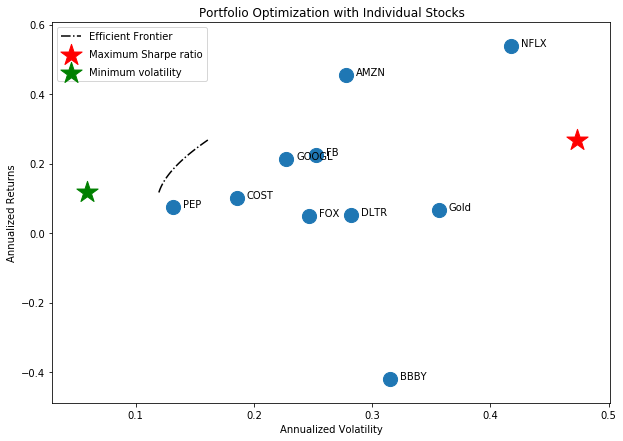

In [29]:
sdp, rp, cmp = optim_info(optimized['x'], returns, cov_mat)
sdp_min, rp_min, cmpmin = optim_info(optimized1['x'],returns, cov_mat)

an_vol = np.std(log_returns) * np.sqrt(252)
an_rt = log_returns.mean() * 252
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(an_vol,an_rt,marker='o',s=200)
for i, txt in enumerate(returns.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
target = np.linspace(rp_min, rp, 50)
efficient_portfolios = efficient_frontier(log_returns.mean(), cov_mat, target)
ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='Efficient Frontier')
ax.set_title('Portfolio Optimization with Individual Stocks')
ax.set_xlabel('Annualized Volatility')
ax.set_ylabel('Annualized Returns')
ax.legend(labelspacing=0.8)